In [110]:

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [111]:
#import train and test CSV files
training= pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")



In [112]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [113]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

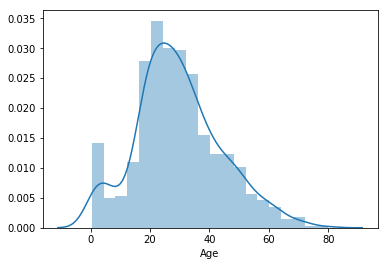

In [114]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [115]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [116]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [117]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
training.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
823,824,1,3,"Moor, Mrs. (Beila)",1,27.0,0,1,12.4750,0
841,842,0,2,"Mudd, Mr. Thomas Charles",0,16.0,0,0,10.5000,0
643,644,1,3,"Foo, Mr. Choong",0,28.0,0,0,56.4958,0
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",1,9.0,4,2,31.2750,0
665,666,0,2,"Hickman, Mr. Lewis",0,32.0,2,0,73.5000,0


In [118]:
#replacing the missing values in the Embarked feature with S
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [119]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [120]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [121]:
titles = set(training["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Don', 'Capt', 'Mlle', 'Mrs', 'Ms', 'Rev', 'Lady', 'Countess', 'Sir', 'Major', 'Master', 'Mr', 'Mme', 'Col', 'Miss', 'Dr', 'Jonkheer'}


In [122]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[1, 1, 2, 125, 1, 6, 1, 1, 1, 2, 40, 517, 1, 2, 182, 7, 1]


In [123]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0        Don          1
1       Capt          1
2       Mlle          2
3        Mrs        125
4         Ms          1
5        Rev          6
6       Lady          1
7   Countess          1
8        Sir          1
9      Major          2
10    Master         40
11        Mr        517
12       Mme          1
13       Col          2
14      Miss        182
15        Dr          7
16  Jonkheer          1


In [124]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6

In [125]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [126]:
#ore representative. We will do this with sklearn's MinMaxScaler function. This function also requires us to reshape our data so that it accepts the input. The steps are shown below.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#scaler requires arguments to be in a specific format shown below
#convert columns into numpy arrays and reshape them 
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

#we replace the original column with the transformed/scaled values
training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [128]:
from sklearn.metrics import make_scorer, accuracy_score 

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = training["Survived"] #define training label set
X_test = testing.drop("PassengerId", axis=1)

In [131]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.30, random_state=101) #X_valid and y_valid are the validation set

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.7910447761194029


In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_valid,pred_logreg))

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       154
          1       0.82      0.66      0.73       114

avg / total       0.79      0.79      0.79       268



In [138]:
rfc = RandomForestClassifier(n_estimators=200)

In [139]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
rfc_pred = rfc.predict(X_valid)

In [141]:
acc_rfc= round(accuracy_score(y_valid,rfc_pred)* 100, 2)

In [142]:
acc_rfc

98.51

In [147]:
print(classification_report(y_valid,rfc_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       154
          1       1.00      0.96      0.98       114

avg / total       0.99      0.99      0.99       268



In [148]:
submission = rfc.predict(X_test)

In [149]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission
    })

In [150]:
submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
